In [4]:
import vtk
import matplotlib.pyplot as plt
import os
import numpy as np
from vtk.util.numpy_support import vtk_to_numpy, numpy_to_vtk
import sys
import platform
if platform.system()=='Windows':
    sys.path.append('C:/Users/d34763s/Desktop/DavidCS/PhD/code/pydar/')
else:
    sys.path.append('/home/thayer/Desktop/DavidCS/ubuntu_partition/code/pydar/')
import pydar

%matplotlib inline
%load_ext autoreload
%autoreload 2

pdal not imported, functions relying on it will fail
opencv was not imported, functions relying on it will fail
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# suffixes
pts_suffix = 'egu'
trans_suffix = 'slfsnow'

# Project path
if platform.system()=='Windows':
    project_path = 'D:\\mosaic_lidar\\ROV\\'
else:
    project_path = '/media/thayer/Data/mosaic_lidar/ROV/'

# Projects
project_names = [
                'mosaic_rov_190120.RiSCAN',
                'mosaic_rov_250120.RiSCAN'
                ]

scan_area = pydar.ScanArea(project_path, project_names, import_mode='read_scan',
                           class_list='all', suffix=pts_suffix, las_fieldnames=['Points',
                            'Classification', 'PointId'])

for project_name in project_names:
    project = scan_area.project_dict[project_name]
    project.read_transforms(suffix=trans_suffix)
    project.apply_transforms(['current_transform'])
    project.create_z_sigma()
    
    # Set the empirical cdf
    project.create_empirical_cdf()
    project.create_normalized_heights()

In [7]:
# Create images for use later
x0 = -95
y0 = -140
nx = 400
ny = 400
dx = 0.1
dy = 0.1
yaw = 0

leafsize = 500000
lengthscale = 10
outputscale = 0.01

for project_name in project_names:
    project = scan_area.project_dict[project_name]
    project.merged_points_to_image(nx, ny, dx, dy, x0, y0, leafsize, lengthscale, outputscale)

/home/thayer/Desktop/DavidCS/ubuntu_partition/code/pydar/pydar.py:5014: UserWarning: Still has temporary fix for negative norm z sigma
  # Create implicit selection loop


In [1]:
# Create a profile
# begin without optimizing

tx0 = x0 + 19
ty0 = y0 + 8.6
tx1 = x0 + 29
ty1 = y0 + 25

N = 500
leafsize = 50000
key = 'test'
n_pts = 500
use_z_sigma = True
lengthscale = 2
outputscale = 0.2
nu = 2.5
optimize = False
max_time = 10

i = 1
scan_area.project_dict[project_names[i]].merged_points_transect_gp(tx0, ty0, tx1, ty1, N, leafsize,
                                                                  key, n_pts=n_pts, use_z_sigma=use_z_sigma,
                                                                  lengthscale=lengthscale, outputscale=
                                                                   outputscale, nu=nu, 
                                                                   optimize=optimize, max_time=max_time)

NameError: name 'x0' is not defined

In [29]:
# Create a profile
# now try optimizing

tx0 = x0 + 19
ty0 = y0 + 7.6
tx1 = x0 + 29
ty1 = y0 + 24

N = 500
leafsize = 50000
key = 'test'
n_pts = 500
use_z_sigma = True
lengthscale = 2
outputscale = 0.2
nu = 2.5
optimize = True
max_time = 10

i = 1
scan_area.project_dict[project_names[i]].merged_points_transect_gp(tx0, ty0, tx1, ty1, N, leafsize,
                                                                  key, n_pts=n_pts, use_z_sigma=use_z_sigma,
                                                                  lengthscale=lengthscale, outputscale=
                                                                   outputscale, nu=nu, 
                                                                   optimize=optimize, max_time=max_time)

pdal not imported, functions relying on it will fail
opencv was not imported, functions relying on it will fail


/home/thayer/Desktop/DavidCS/ubuntu_partition/code/pydar/pydar.py:5939: UserWarning: Still has temporary fix for negative norm z sigma
  warnings.warn('Still has temporary fix for negative norm z sigma')


In [31]:
# Create a profile
# now without using z_sigma

tx0 = x0 + 19
ty0 = y0 + 7.6
tx1 = x0 + 29
ty1 = y0 + 24

N = 500
leafsize = 50000
key = 'test'
n_pts = 500
use_z_sigma = False
lengthscale = 2
outputscale = 0.2
nu = 2.5
optimize = True
max_time = 10

i = 1
scan_area.project_dict[project_names[i]].merged_points_transect_gp(tx0, ty0, tx1, ty1, N, leafsize,
                                                                  key, n_pts=n_pts, use_z_sigma=use_z_sigma,
                                                                  lengthscale=lengthscale, outputscale=
                                                                   outputscale, nu=nu, 
                                                                   optimize=optimize, max_time=max_time)

pdal not imported, functions relying on it will fail
opencv was not imported, functions relying on it will fail


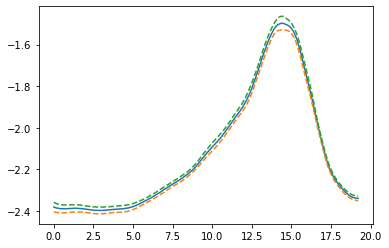

In [34]:
# Extract profile
gp_trans = scan_area.project_dict[project_names[i]].get_profile('test')

plt.plot(gp_trans[:,2], gp_trans[:,3])
plt.plot(gp_trans[:,2], gp_trans[:,4], '--')
plt.plot(gp_trans[:,2], gp_trans[:,5], '--')

In [32]:
# Try displaying pointcloud with profile

z_min = -2.6
z_max = -1.4

scan_area.project_dict[project_names[i]].display_project(z_min, z_max, profile_list=[['test']])

In [21]:
# Try displaying profile on top of image
z_min = -2.6
z_max = -1.4

scan_area.project_dict[project_names[i]].display_image(z_min, z_max, profile_list=[['test']])


In [22]:
# Try displaying profile on top of image, and warp scalars
z_min = -2.6
z_max = -1.4

scan_area.project_dict[project_names[i]].display_image(z_min, z_max, 
                                                       warp_scalars=True,
                                                       profile_list=[['test']])

In [23]:
# Create difference between the images
for i in range(len(project_names)-1):
    scan_area.difference_projects(project_names[i], project_names[i+1])

pdal not imported, functions relying on it will fail
opencv was not imported, functions relying on it will fail


In [26]:
diff_window = 0.1

i = 0

scan_area.display_difference(project_names[i], project_names[i+1], 
                                  diff_window, cmap='RdBu_r',
                            profile_list=[['test']])

pdal not imported, functions relying on it will fail
opencv was not imported, functions relying on it will fail


In [33]:
diff_window = 0.1

i = 0

scan_area.display_warp_difference(project_names[i], project_names[i+1], 
                                  diff_window, cmap='RdBu_r',
                             field='Elevation',
                            profile_list=[['test']])